In [16]:
import ateam.analysis.bmtk.cell_vars as cv
import ateam.sim.singlecell_analysis as sca
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path

In [24]:
networks_path = "/home/tom.chartrand/network/bmtk_networks/"
sim_path = networks_path + "singlecell/ih_psp_met/{}/config.json"
cell = 786497938
config_path = sim_path.format(cell)

In [25]:
df = sca.extract_psp_data(config_path)
df.head()

,amp,area,latency,peak_time,rise_time,width,node_type_id,distance_range_max,distance_range_min,ih_factor,target_sections,cell_id,dynamics_params,spike_time,model_processing,model_type,model_template,morphology,cell_name
gid,,,,,,,,,,,,,,,,,,,
0,0.423461,7.873153,0.05,2.075,0.675,10.65,100,1.0,0.0,0.1,s,786497938,optim_param_786497938.json,500,aibs_allactive_ani,biophysical,ctdb:Biophys1.hoc,786497938.swc,786497938
1,0.423461,7.873153,0.05,2.075,0.675,10.65,100,1.0,0.0,0.1,s,786497938,optim_param_786497938.json,500,aibs_allactive_ani,biophysical,ctdb:Biophys1.hoc,786497938.swc,786497938
2,0.423461,7.873153,0.05,2.075,0.675,10.65,100,1.0,0.0,0.1,s,786497938,optim_param_786497938.json,500,aibs_allactive_ani,biophysical,ctdb:Biophys1.hoc,786497938.swc,786497938
3,0.423461,7.873153,0.05,2.075,0.675,10.65,100,1.0,0.0,0.1,s,786497938,optim_param_786497938.json,500,aibs_allactive_ani,biophysical,ctdb:Biophys1.hoc,786497938.swc,786497938
4,0.423461,7.873153,0.05,2.075,0.675,10.65,100,1.0,0.0,0.1,s,786497938,optim_param_786497938.json,500,aibs_allactive_ani,biophysical,ctdb:Biophys1.hoc,786497938.swc,786497938


In [26]:
# filter down to a single repeat for each set of conditions
cols = ["distance_range_min", "target_sections", "ih_factor"]
trace_df = df.reset_index().groupby(cols).first()
trace_df.head()

gid       amp      area  \
distance_range_min target_sections ih_factor                            
0.0                a               0.1         25  0.366372  7.633129   
                                   0.5         30  0.355226  7.025619   
                                   1.0         35  0.362064  6.539454   
                                   2.0         40  0.346109  5.772753   
                                   3.0         45  0.343032  5.291401   

                                              latency  peak_time  rise_time  \
distance_range_min target_sections ih_factor                                  
0.0                a               0.1          0.075      2.650      0.875   
                                   0.5          0.075      2.700      0.900   
                                   1.0          0.050      2.600      0.850   
                                   2.0          0.075      2.725      0.925   
                                   3.0          0.075      2.600      0.875   

                                               width  node_type_id  \
distance_range_min target_sections ih_factor                         
0.0                a               0.1        13.050           100   
                                   0.5        12.975           100   
                                   1.0        12.125           100   
                                   2.0        12.075           100   
                                   3.0        11.625           100   

                                              distance_range_max    cell_id  \
distance_range_min target_sections ih_factor                                  
0.0                a               0.1                      40.0  786497938   
                                   0.5                      40.0  786497938   
                                   1.0                      40.0  786497938   
                                   2.0                      40.0  786497938   
                                   3.0                      40.0  786497938   

                                                         dynamics_params  \
distance_range_min target_sections ih_factor                               
0.0                a               0.1        optim_param_786497938.json   
                                   0.5        optim_param_786497938.json   
                                   1.0        optim_param_786497938.json   
                                   2.0        optim_param_786497938.json   
                                   3.0        optim_param_786497938.json   

                                              spike_time    model_processing  \
distance_range_min target_sections ih_factor                                   
0.0                a               0.1               500  aibs_allactive_ani   
                                   0.5               500  aibs_allactive_ani   
                                   1.0               500  aibs_allactive_ani   
                                   2.0               500  aibs_allactive_ani   
                                   3.0               500  aibs_allactive_ani   

                                               model_type     model_template  \
distance_range_min target_sections ih_factor                                   
0.0                a               0.1        biophysical  ctdb:Biophys1.hoc   
                                   0.5        biophysical  ctdb:Biophys1.hoc   
                                   1.0        biophysical  ctdb:Biophys1.hoc   
                                   2.0        biophysical  ctdb:Biophys1.hoc   
                                   3.0        biophysical  ctdb:Biophys1.hoc   

                                                 morphology  cell_name  
distance_range_min target_sections ih_factor                            
0.0                a               0.1        786497938.swc  786497938  
                                   0.5        786497938.swc  

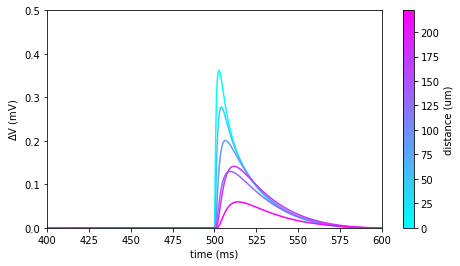

In [38]:
report = cv.get_cellvar_report(config_path)
tt = report.time_trace

plot_df = trace_df.xs(['a',1], level=["target_sections", "ih_factor"])
v_dist = cv.data_multicell(report, plot_df['gid'])
spike_time = trace_df.spike_time.iloc[0]
i0 = np.flatnonzero(tt>spike_time)[0]
v_dist = v_dist - v_dist[:,i0,None]

fig, ax = plt.subplots(figsize=(7.5,4))
segments = [np.column_stack([tt, v]) for v in v_dist]
lc = LineCollection(segments, cmap='cool')
lc.set_array(plot_df.index)
ax.add_collection(lc)
plt.colorbar(lc, label='distance (um)')
plt.autoscale()
ax.set_xlim(400, 600)
ax.set_ylim(0, 0.5)
plt.xlabel("time (ms)")
plt.ylabel("$\Delta$V (mV)")
plt.show()

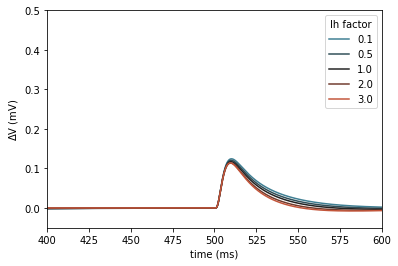

In [36]:
plot_df = trace_df.reset_index().query("target_sections=='d' and distance_range_min>250 and distance_range_min<300")
v_dist = cv.data_multicell(report, plot_df['gid'])
spike_time = trace_df.spike_time.iloc[0]
i0 = np.flatnonzero(tt>spike_time)[0]
v_dist = v_dist - v_dist[:,i0,None]

fig, ax = plt.subplots()
palette = sns.diverging_palette(220, 20, n=5, center='dark')
for i in range(len(plot_df)):
    ax.plot(tt, v_dist[i], label=plot_df["ih_factor"].iloc[i], color=palette[i])
ax.autoscale()
ax.set_xlim(400, 600)
ax.set_ylim(-0.05,0.5)
ax.legend(title='Ih factor')
plt.xlabel("time (ms)")
plt.ylabel("$\Delta$V (mV)")
plt.show()